# (PISA 2012 Dataset)
## by (Gad Mohamed)




---




### **Table of contents**
* Introduction
* Data Wrangling
* Uni-variate exploration 
* Bi-variate exploration 
* Multi-variate exploration

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Download dataset

In [2]:
#don't print output
%%capture 

#download PISA2012 dataset
!wget 'https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip'
!unzip pisa2012.csv.zip


#download PISA2012 dictionary
!wget 'https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv'


## Functions

In [3]:
def get_col_names(df, part_of_name, verbose = 1):
  #return the list of names of columns that contains the input <part_of_name> in its name
  column_names = [column  for column in df.columns if part_of_name in column]
  if verbose : print('found {} columns contains {}'.format(len(column_names), part_of_name))
  return column_names

def get_columns(df, names):
  # return the list of columns which their names are in the input variable <names>
  return df[names].copy() 

def drop_columns(df, names):
  # drop the list of columns which their names are in the input variable <names>
  return df.drop(names, axis= 1)

## Introduction

### This is the exploration notebook of the PISA2012 dataset. PISA is an education assessment dataset based on survey's on students, parents and teachers. 

### The size of the dataset is huge, but in this analysis, I will only focus on certian questions and will only keep relevant features to answer them.

### The questions I am answering are:


1.   Do parents' educational background influence students' grades ?
2.   what is the relation between studying time, and parent's educational background.
3.   Which country do the most successful students belong to ?






### read the dataset

In [4]:
pisa_df = pd.read_csv('pisa2012.csv', encoding = 'cp1252')
pisa_dict_df = pd.read_csv('pisadict2012.csv', encoding = 'cp1252')

pisa_dict_df.rename(columns = {'Unnamed: 0': 'code'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pisa_df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,...,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,1996,Female,No,6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,Yes,Yes,NaN,NaN,<ISCED level 3A>,No,No,No,No,"Other (e.g. home duties, retired)",<ISCED level 3A>,NaN,NaN,NaN,NaN,Working part-time <for pay>,Country of test,...,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,4.5084,4.5315,13.0829,4.5315,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,1996,Female,"Yes, for more than one year",7.0,"No, never","No, never","No, never",One or two times,None,1.0,Yes,Yes,NaN,Yes,NaN,NaN,<ISCED level 3A>,Yes,Yes,No,No,Working full-time <for pay>,<ISCED level 3A>,No,No,No,No,Working full-time <for pay>,Country of test,...,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,4.5084,4.5315,13.0829,4.5315,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,No,Yes,No,No,"<ISCED level 3B, 3C>",Yes,Yes,Yes,No,Working full-time <for pay>,<ISCED level 3A>,Yes,No,Yes,Yes,Working full-time <for pay>,Country of test,...,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,No,Yes,No,No,"<ISCED level 3B, 3C>",No,No,No,No,Working full-time <for pay>,<ISCED level 3A>,Yes,Yes,No,No,Working full-time <for pay>,Country of test,...,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never","No, never",One or two times,None,2.0,Yes,Yes,Yes,NaN,NaN,NaN,She did not complete <ISCED level 1>,No,No,No,No,Working part-time <for pay>,"<ISCED level 3B, 3C>",No,No,No,Yes,Working part-time <for pay>,Country of test,...,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [6]:
pisa_dict_df.head()

,code,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


In [7]:
pisa_df.shape

(485490, 636)

## Data wrangling

#### rename columns to their corresponding values in PISA dictionary

In [8]:
#columns that I will work about in this project
codes = ['CNT', 'ST13Q01', 'ST14Q01', 'ST14Q02', 'ST14Q03', 'ST14Q04', 'ST17Q01', 'ST18Q01', 'ST18Q02', 'ST18Q03', 'ST18Q04', 'ST57Q01', 'ST57Q02',
         'ST57Q03', 'ST57Q04', 'ST57Q05', 'PV1MATH', 'PV2MATH', 'PV3MATH',
           'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ',  'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']

#the names of these codes in the PISA dictionary csv
names = pisa_dict_df.loc[pisa_dict_df.code.isin(codes)].x.values

In [9]:
#create a much smaller dataset that contains only relevant columns and renamed them to their original names
clean_pisa = pisa_df[codes].rename(columns = {code:name.replace(' ','_').lower() for code, name in zip(codes, names)})

#drop duplicates
clean_pisa.drop_duplicates(inplace = True) 

clean_pisa.head(20)

,country_code_3-character,mother<highest_schooling>,mother_qualifications_-_<isced_level_6>,mother_qualifications_-_<isced_level_5a>,mother_qualifications_-_<isced_level_5b>,mother_qualifications_-_<isced_level_4>,father<highest_schooling>,father_qualifications_-_<isced_level_6>,father_qualifications_-_<isced_level_5a>,father_qualifications_-_<isced_level_5b>,father_qualifications_-_<isced_level_4>,out-of-school_study_time_-_homework,out-of-school_study_time_-_guided_homework,out-of-school_study_time_-_personal_tutor,out-of-school_study_time_-_commercial_company,out-of-school_study_time_-_with_parent,plausible_value_1_in_mathematics,plausible_value_2_in_mathematics,plausible_value_3_in_mathematics,plausible_value_4_in_mathematics,plausible_value_5_in_mathematics,plausible_value_1_in_reading,plausible_value_2_in_reading,plausible_value_3_in_reading,plausible_value_4_in_reading,plausible_value_5_in_reading,plausible_value_1_in_science,plausible_value_2_in_science,plausible_value_3_in_science,plausible_value_4_in_science,plausible_value_5_in_science
0,Albania,<ISCED level 3A>,No,No,No,No,<ISCED level 3A>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,<ISCED level 3A>,Yes,Yes,No,No,<ISCED level 3A>,No,No,No,No,NaN,NaN,6.0,0.0,0.0,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,Albania,"<ISCED level 3B, 3C>",Yes,Yes,Yes,No,<ISCED level 3A>,Yes,No,Yes,Yes,NaN,6.0,6.0,7.0,2.0,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,Albania,"<ISCED level 3B, 3C>",No,No,No,No,<ISCED level 3A>,Yes,Yes,No,No,10.0,2.0,2.0,0.0,0.0,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,Albania,She did not complete <ISCED level 1>,No,No,No,No,"<ISCED level 3B, 3C>",No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746
5,Albania,"<ISCED level 3B, 3C>",No,No,No,No,<ISCED level 2>,No,No,No,No,3.0,2.0,9.0,9.0,1.0,396.3312,354.2686,372.1841,387.7629,315.3217,378.2544,366.3398,387.7861,335.3617,219.3924,384.3156,358.2059,405.7628,403.8978,325.5688
6,Albania,"<ISCED level 3B, 3C>",No,Yes,No,No,<ISCED level 3A>,NaN,NaN,NaN,Yes,3.0,3.0,2.0,2.0,0.0,438.0823,540.1231,489.4921,443.5348,539.3441,373.2503,374.0446,401.8454,338.3006,373.2503,508.1499,462.4580,499.7576,519.3398,466.1880
7,Albania,<ISCED level 3A>,No,Yes,No,No,<ISCED level 3A>,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN,576.5773,516.5992,532.9568,549.3145,535.2937,567.7589,465.1099,431.4282,535.6811,582.9958,611.2831,596.3633,554.4013,513.3719,519.8993
8,Albania,<ISCED level 3A>,NaN,NaN,NaN,NaN,<ISCED level 3A>,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,434.1097,353.1002,392.8260,425.5414,438.0044,313.9153,332.9787,316.2982,391.7577,278.9657,373.0325,317.0832,376.7624,409.3995,382.3573
9,Albania,<ISCED level 3A>,No,No,No,No,<ISCED level 3A>,No,No,No,No,NaN,NaN,0.0,9.0,9.0,463.6314,441.0422,425.4635,421.5688,417.6741,454.5082,420.3529,360.7796,450.5366,323.4470,404.2708,343.6591,339.9291,335.2667,287.7098


#### Inspect dataset

In [10]:
print('shape before dropping null rows:', clean_pisa.shape)
clean_pisa.dropna(axis= 'rows', inplace = True) 
print('shape after dropping null rows:', clean_pisa.shape)

shape before dropping null rows: (485490, 31)
shape after dropping null rows: (132260, 31)


In [11]:
clean_pisa.describe()

,out-of-school_study_time_-_homework,out-of-school_study_time_-_guided_homework,out-of-school_study_time_-_personal_tutor,out-of-school_study_time_-_commercial_company,out-of-school_study_time_-_with_parent,plausible_value_1_in_mathematics,plausible_value_2_in_mathematics,plausible_value_3_in_mathematics,plausible_value_4_in_mathematics,plausible_value_5_in_mathematics,plausible_value_1_in_reading,plausible_value_2_in_reading,plausible_value_3_in_reading,plausible_value_4_in_reading,plausible_value_5_in_reading,plausible_value_1_in_science,plausible_value_2_in_science,plausible_value_3_in_science,plausible_value_4_in_science,plausible_value_5_in_science
count,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000,132260.000000
mean,6.204038,1.438258,0.751187,0.649735,0.950174,505.271139,505.308303,505.326547,505.299975,505.368981,504.941385,504.990107,505.161438,504.846838,505.022772,510.550793,510.613091,510.652876,510.547162,510.503323
std,5.745161,2.433629,1.811203,1.904501,1.960963,95.790091,96.017949,95.900810,95.873217,96.053245,94.065151,94.264690,94.128151,94.081782,94.197003,93.749250,94.030185,93.828178,93.999613,94.093138
min,0.000000,0.000000,0.000000,0.000000,0.000000,71.124800,71.124800,104.619100,86.158300,73.695300,0.083400,3.109300,2.387600,6.437900,2.307400,59.436800,53.189100,40.134300,44.517000,60.369300
25%,2.000000,0.000000,0.000000,0.000000,0.000000,439.250700,438.861200,438.861200,439.484300,439.250700,443.822800,443.943900,444.259300,443.943900,443.698000,447.351700,447.351700,448.004500,447.351700,447.351700
50%,5.000000,1.000000,0.000000,0.000000,0.000000,505.616100,505.694000,505.694000,505.694000,505.694000,509.553900,510.018800,510.018800,509.778200,509.457500,513.278600,513.558400,513.371900,513.558400,513.278600
75%,8.000000,2.000000,1.000000,0.000000,1.000000,571.436400,571.280600,571.592100,571.670000,571.903700,570.806300,570.966600,570.886400,570.477500,570.715800,576.408100,576.035100,576.408100,576.221600,576.314800
max,30.000000,30.000000,30.000000,30.000000,30.000000,962.229300,957.010400,935.745400,943.456900,907.625800,869.932400,850.312900,838.080600,881.159000,901.608600,903.338300,900.540800,866.411800,926.557300,880.958600


In [12]:
clean_pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132260 entries, 3 to 480529
Data columns (total 31 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   country_code_3-character                       132260 non-null  object 
 1   mother<highest_schooling>                      132260 non-null  object 
 2   mother_qualifications_-_<isced_level_6>        132260 non-null  object 
 3   mother_qualifications_-_<isced_level_5a>       132260 non-null  object 
 4   mother_qualifications_-_<isced_level_5b>       132260 non-null  object 
 5   mother_qualifications_-_<isced_level_4>        132260 non-null  object 
 6   father<highest_schooling>                      132260 non-null  object 
 7   father_qualifications_-_<isced_level_6>        132260 non-null  object 
 8   father_qualifications_-_<isced_level_5a>       132260 non-null  object 
 9   father_qualifications_-_<isced_level_

In [13]:
clean_pisa['father_qualifications_-_<isced_level_6>'].value_counts()

No     124368
Yes      7892
Name: father_qualifications_-_<isced_level_6>, dtype: int64

In [14]:
clean_pisa['mother<highest_schooling>'].value_counts()

<ISCED level 3A>                         72141
<ISCED level 3B, 3C>                     26804
<ISCED level 2>                          23492
<ISCED level 1>                           6590
She did not complete <ISCED level 1>      3233
Name: mother<highest_schooling>, dtype: int64

#### changing different scores to a more representitive number (average) of student's abilities. And to make calculations, comparisons, visualizations easier.

In [15]:
# combining all scores (math, reading, and science) into one single number (average) 

math_cols_names = get_col_names(clean_pisa, 'in_mathematics')
reading_cols_names = get_col_names(clean_pisa, 'in_reading')
sci_cols_names = get_col_names(clean_pisa, 'in_science')

math_cols = get_columns(clean_pisa, math_cols_names)
reading_cols = get_columns(clean_pisa, reading_cols_names)
sci_cols = get_columns(clean_pisa, sci_cols_names)

math_avg_col = math_cols.mean(axis = 1) 
reading_avg_col = reading_cols.mean(axis= 1) 
sci_avg_col = sci_cols.mean(axis= 1) 
avg_score = math_avg_col.add(reading_avg_col)
avg_score = avg_score.add(sci_avg_col) 
avg_score = avg_score.div(3) 

clean_pisa = drop_columns(clean_pisa, math_cols_names)
clean_pisa = drop_columns(clean_pisa, reading_cols_names) 
clean_pisa = drop_columns(clean_pisa, sci_cols_names) 

clean_pisa['average_reading_score'] = reading_avg_col 
clean_pisa['average_math_score'] = math_avg_col 
clean_pisa['average_sci_score'] = sci_avg_col 
clean_pisa['average_total_score'] = avg_score
clean_pisa.head()

found 5 columns contains in_mathematics
found 5 columns contains in_reading
found 5 columns contains in_science


,country_code_3-character,mother<highest_schooling>,mother_qualifications_-_<isced_level_6>,mother_qualifications_-_<isced_level_5a>,mother_qualifications_-_<isced_level_5b>,mother_qualifications_-_<isced_level_4>,father<highest_schooling>,father_qualifications_-_<isced_level_6>,father_qualifications_-_<isced_level_5a>,father_qualifications_-_<isced_level_5b>,father_qualifications_-_<isced_level_4>,out-of-school_study_time_-_homework,out-of-school_study_time_-_guided_homework,out-of-school_study_time_-_personal_tutor,out-of-school_study_time_-_commercial_company,out-of-school_study_time_-_with_parent,average_reading_score,average_math_score,average_sci_score,average_total_score
3,Albania,"<ISCED level 3B, 3C>",No,No,No,No,<ISCED level 3A>,Yes,Yes,No,No,10.0,2.0,2.0,0.0,0.0,477.46376,449.45476,453.97240,460.296973
5,Albania,"<ISCED level 3B, 3C>",No,No,No,No,<ISCED level 2>,No,No,No,No,3.0,2.0,9.0,9.0,1.0,337.42688,365.17370,375.55018,359.383587
13,Albania,<ISCED level 3A>,No,No,No,Yes,<ISCED level 3A>,No,No,No,Yes,8.0,8.0,0.0,0.0,8.0,502.24622,448.20844,505.35248,485.269047
14,Albania,<ISCED level 2>,No,No,No,No,<ISCED level 3A>,No,Yes,No,No,1.0,1.0,0.0,0.0,0.0,283.22874,297.25036,294.42372,291.634273
28,Albania,<ISCED level 2>,No,No,No,No,<ISCED level 2>,No,No,No,No,10.0,7.0,0.0,3.0,1.0,323.28816,364.23900,289.38830,325.638487


#### Parents' qualifications is coded by the international standard classification of education code (ISCED) and separated to mother and father qualification. In this analysis, I am interested in Parents' qualifications in general and not each of them separately. In addition, qualifications are not formated well, sometimes they are separated in more than one column (levels 5a, 5b, and 6) and sometimes they are combined in one column (highest schooling). 




1.   I will change the string given for each code to only the code number (i.e. from "<ISCED level 3A>" to 3)
2.   I will combine father and mother qualification into their average.



In [16]:
#combining parents' qualifications

high_school_recoding_dict = {'<ISCED level 3A> ' : 4,
                             '<ISCED level 3B, 3C> ' : 3,
                             '<ISCED level 2> ' : 2,
                             '<ISCED level 1> ' : 1,
                             'She did not complete <ISCED level 1> ' : 0}
     
father_highschool = clean_pisa['father<highest_schooling>'].map(high_school_recoding_dict)
mother_highschool = clean_pisa['mother<highest_schooling>'].map(high_school_recoding_dict)

father_qualifications = get_columns(clean_pisa, get_col_names(clean_pisa, 'father_qualifications'))
father_qualifications = father_qualifications.applymap(lambda x : 1 if x=='Yes' else 0).sum(axis = 1)
father_qualifications = father_qualifications.add(father_highschool)

mother_qualifications = get_columns(clean_pisa, get_col_names(clean_pisa, 'mother_qualifications'))
mother_qualifications = mother_qualifications.applymap(lambda x : 1 if x=='Yes' else 0).sum(axis = 1)
mother_qualifications = mother_qualifications.add(mother_highschool) 

parents_qualifications = mother_qualifications.add(father_qualifications)

clean_pisa = drop_columns(clean_pisa, get_col_names(clean_pisa, 'father'))
clean_pisa = drop_columns(clean_pisa, get_col_names(clean_pisa, 'mother'))

clean_pisa['father_qualifications'] = father_qualifications 
clean_pisa['mother_qualifications'] = mother_qualifications 
clean_pisa['parents_qualifications'] = parents_qualifications


clean_pisa.info()

found 4 columns contains father_qualifications
found 4 columns contains mother_qualifications
found 5 columns contains father
found 5 columns contains mother
<class 'pandas.core.frame.DataFrame'>
Int64Index: 132260 entries, 3 to 480529
Data columns (total 13 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   country_code_3-character                       132260 non-null  object 
 1   out-of-school_study_time_-_homework            132260 non-null  float64
 2   out-of-school_study_time_-_guided_homework     132260 non-null  float64
 3   out-of-school_study_time_-_personal_tutor      132260 non-null  float64
 4   out-of-school_study_time_-_commercial_company  132260 non-null  float64
 5   out-of-school_study_time_-_with_parent         132260 non-null  float64
 6   average_reading_score                          132260 non-null  float64
 7   average_math_score               

#### averaging study time into a single column to be representitive and easier to work with and visualize

In [17]:
# combining all study columns into one single average study columns 

study_cols_names = get_col_names(clean_pisa, 'study_time')

study_cols = get_columns(clean_pisa, study_cols_names)

average_study_time = study_cols.sum(axis= 1).div(len(study_cols_names))
clean_pisa = drop_columns(clean_pisa, study_cols_names)

clean_pisa['average_study_time'] = average_study_time


clean_pisa.head()

found 5 columns contains study_time


,country_code_3-character,average_reading_score,average_math_score,average_sci_score,average_total_score,father_qualifications,mother_qualifications,parents_qualifications,average_study_time
3,Albania,477.46376,449.45476,453.97240,460.296973,6.0,3,9.0,2.8
5,Albania,337.42688,365.17370,375.55018,359.383587,2.0,3,5.0,4.8
13,Albania,502.24622,448.20844,505.35248,485.269047,5.0,5,10.0,4.8
14,Albania,283.22874,297.25036,294.42372,291.634273,5.0,2,7.0,0.4
28,Albania,323.28816,364.23900,289.38830,325.638487,2.0,2,4.0,4.2


In [18]:
#drop rows with null values and duplicated rows
clean_pisa.dropna(axis= 'rows', inplace = True) 
clean_pisa.drop_duplicates(inplace = True) 

#rename 'country_code_3-character' column to 'country'
clean_pisa.rename(columns = {get_col_names(clean_pisa, 'country')[0] : 'country'}, inplace = True) 

found 1 columns contains country


In [19]:
clean_pisa.shape

(129199, 9)

In [20]:
clean_pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129199 entries, 3 to 480529
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   country                 129199 non-null  object 
 1   average_reading_score   129199 non-null  float64
 2   average_math_score      129199 non-null  float64
 3   average_sci_score       129199 non-null  float64
 4   average_total_score     129199 non-null  float64
 5   father_qualifications   129199 non-null  float64
 6   mother_qualifications   129199 non-null  int64  
 7   parents_qualifications  129199 non-null  float64
 8   average_study_time      129199 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.9+ MB


### What is the structure of your dataset?

> The original PISA2012 dataset contains 485490 records and 636 features. After removing irrelevant features and merging parents' qualifications, study time, and subjects' scores, the clean dataset has 129199 records and 9 features.

### What is/are the main feature(s) of interest in your dataset?

> The main features are:


1.   Average student score
2.   Parents' qualifications
3.   Average study time
4.   country



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The dataset has been reduced to its most basic, relevant features. All the four features are relevant and supportive to the investigation.

## Univariate Exploration


#### plot the distributino of average study time for students in the dataset

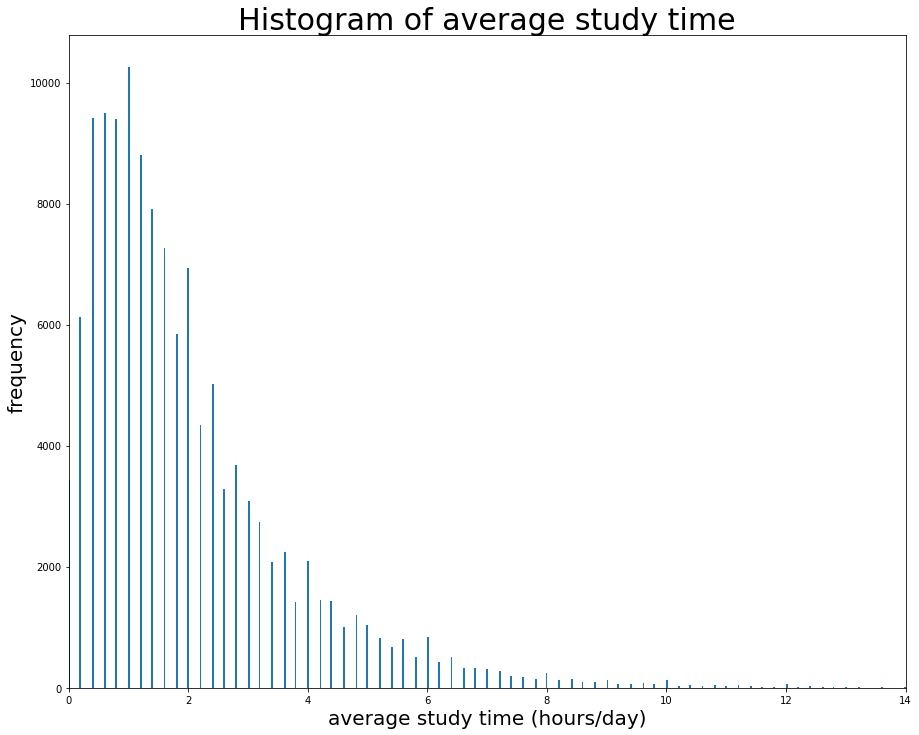

In [21]:
plt.figure(figsize= (15, 12)) 
step = 0.03
bins = np.arange(0, clean_pisa.average_study_time.max() + step, step) 
plt.hist(data=clean_pisa, x = 'average_study_time', bins = bins)
plt.title('Histogram of average study time', fontsize = 30)
plt.xlabel('average study time (hours/day)')
plt.ylabel('frequency')
plt.xlim(0, 14)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 10)
ax.yaxis.set_tick_params(labelsize = 10)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()



> average study time distribution takes a skewed normal distribution shape. The plot is limited on the x-axis to 14 hours/day to enlarge the histogram.



#### plot the number of records for each country in the dataset

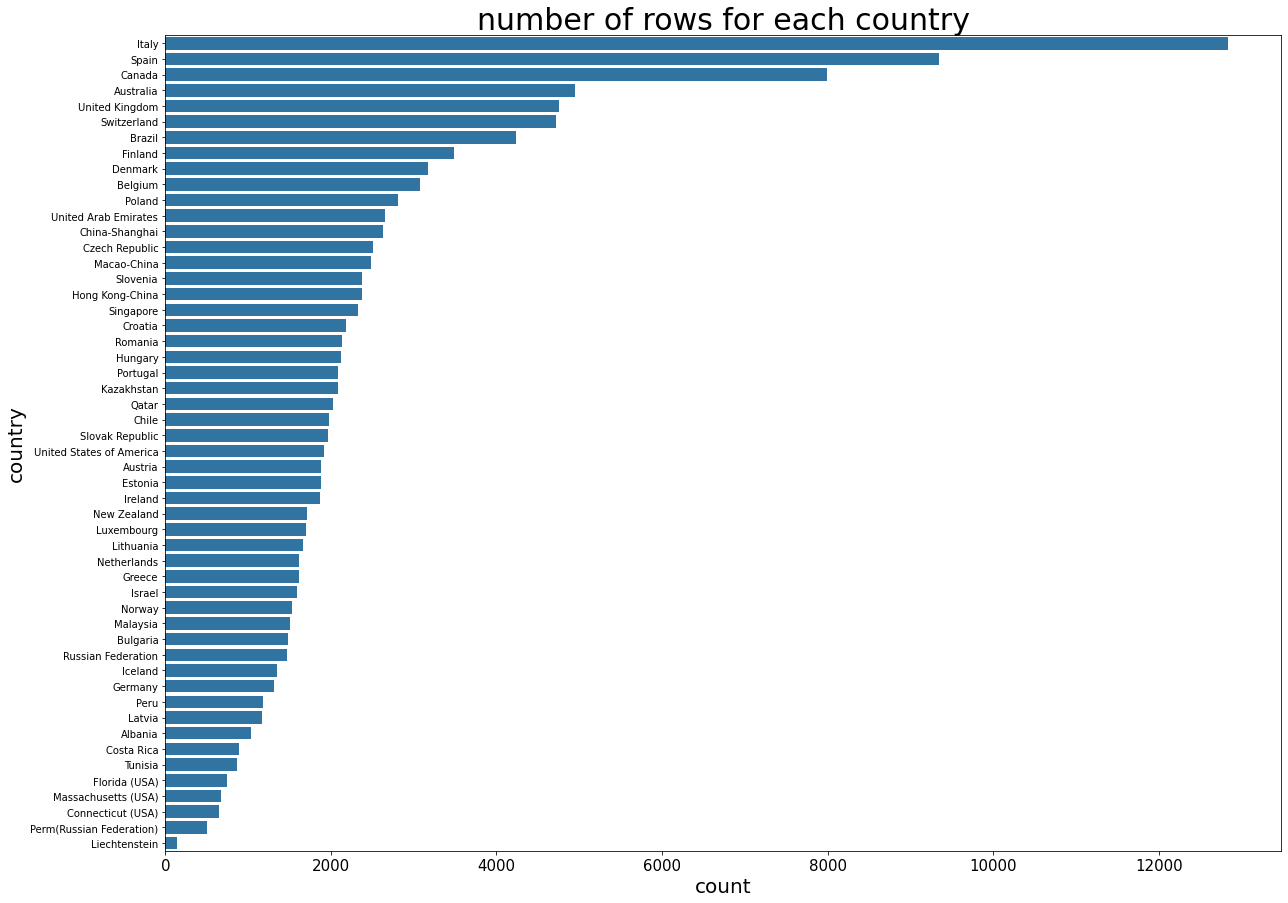

In [22]:
plt.figure(figsize = (20, 15))
order = clean_pisa.country.value_counts().index
sb.countplot(data = clean_pisa, y = 'country', color = sb.color_palette()[0], order = order)

plt.title('number of rows for each country', fontsize = 30)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 10)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

> The most country represented in the data is Italy while the least is Liechtenstein

#### plot the distribution of parents' educational background in the dataset

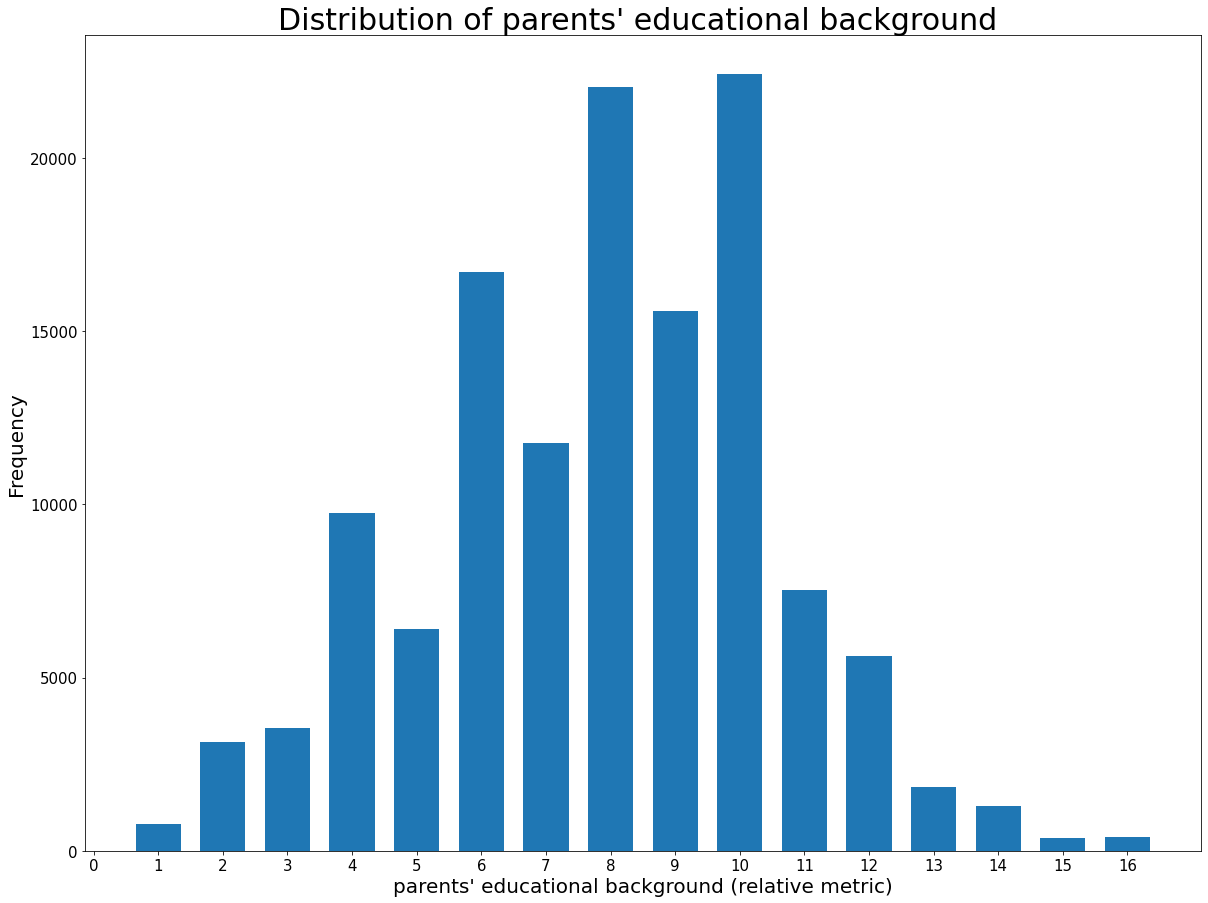

In [23]:
plt.figure(figsize = (20, 15))
bins_edges = np.arange(0.5, clean_pisa.parents_qualifications.max()+1.5, 1)
plt.hist(data = clean_pisa, x = 'parents_qualifications', bins = bins_edges, rwidth = 0.7)
plt.xticks(np.arange(0, clean_pisa.parents_qualifications.max()+1, 1))
plt.title("Distribution of parents' educational background ", fontsize = 30)
plt.xlabel("parents' educational background (relative metric)", fontsize = 20) 
plt.ylabel("Frequency", fontsize = 20) 

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)

plt.show()

> Parents' educational background is normally distributed. The numbers used in the x-axis represent relative values that starts with 0: below secondary school, and ends with 16: both parents have Bachelor

#### plot the distribution of students' average scores in the dataset

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


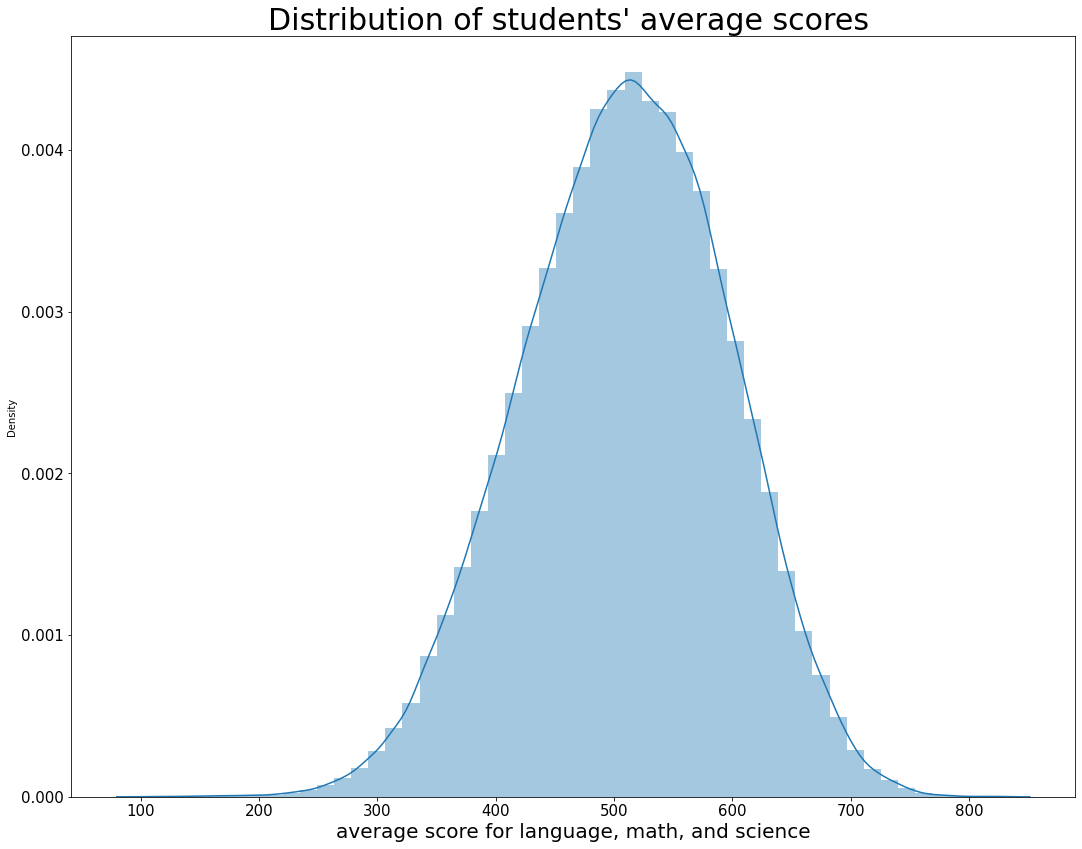

In [24]:
plt.figure(figsize = (18, 14))

sb.distplot(clean_pisa.average_total_score )

plt.title("Distribution of students' average scores ", fontsize = 30)
plt.xlabel("average score for language, math, and science", fontsize = 20) 

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)

plt.show()



> The distribution is perfectly the upside bell curve (normally distributed) , which is expected. 



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No, there was no unusual points.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I expected the distribution of parents' educational background to be left skewed (more education level that I got). But after I checked the dataset, I found nothing wrong and I think my assumption that parents should have higher educational background is not accurate since the sample of students in the dataset is totally random.

## Bivariate Exploration


#### Lets plot the relation between fathers' qualifications and mothers' qualifications

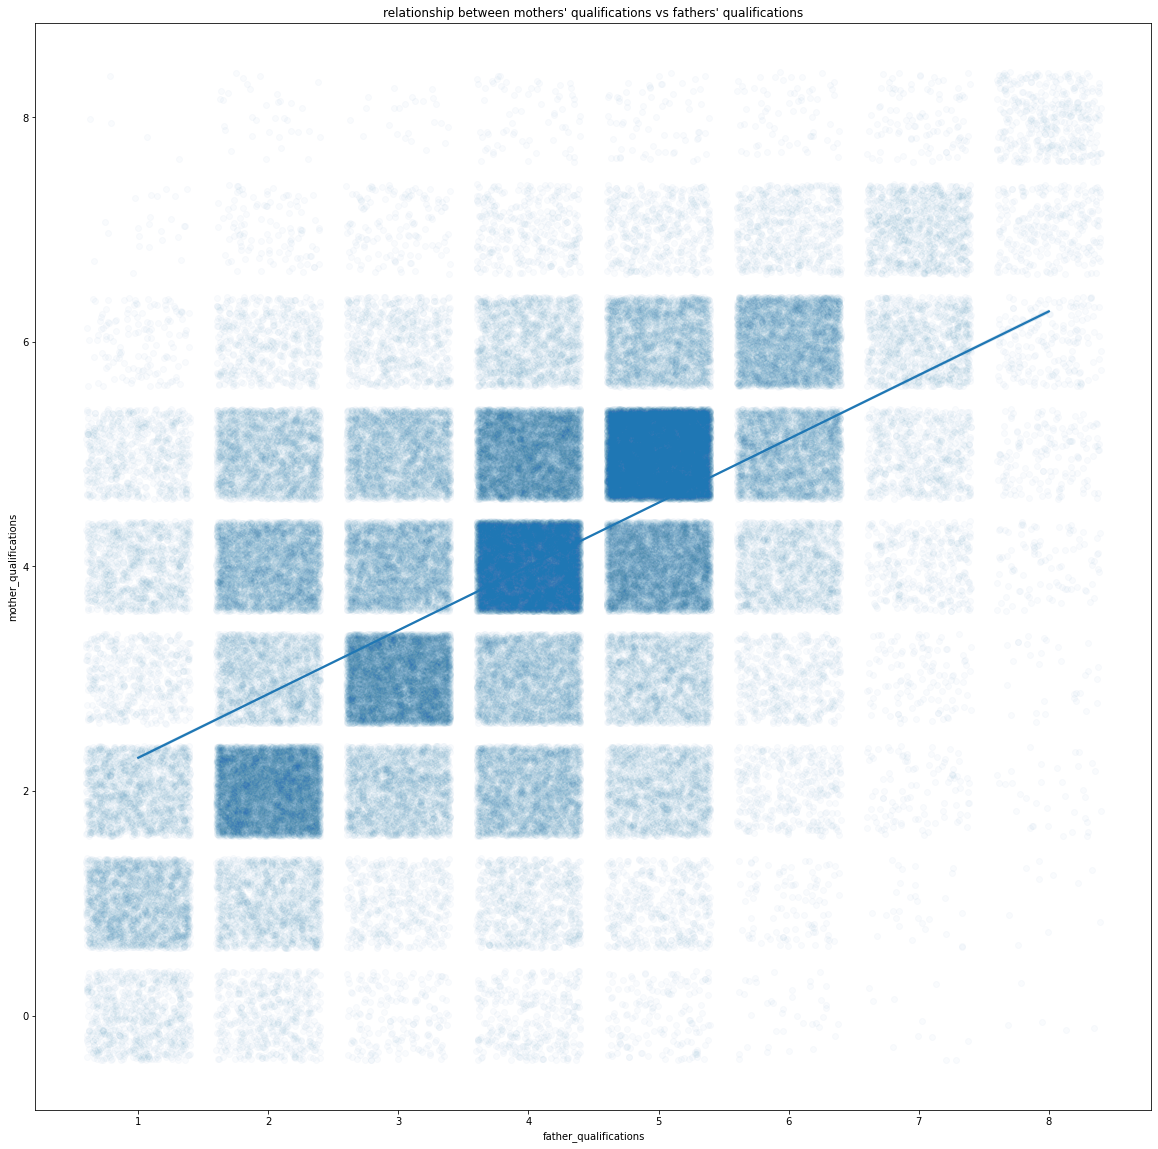

In [95]:
plt.figure(figsize = (20,20))

sb.regplot(x = clean_pisa.father_qualifications, y = clean_pisa.mother_qualifications, x_jitter = 0.4, y_jitter = 0.4, scatter_kws = {'alpha':1/40}, color = sb.color_palette()[0])
plt.title("relationship between mothers' qualifications vs fathers' qualifications")
plt.show()

The linear relationship between fathers' and mothers' qualifications indicates that families usually have similar educational background.

#### Lets plot the relation between parents' qualifications and children's average score

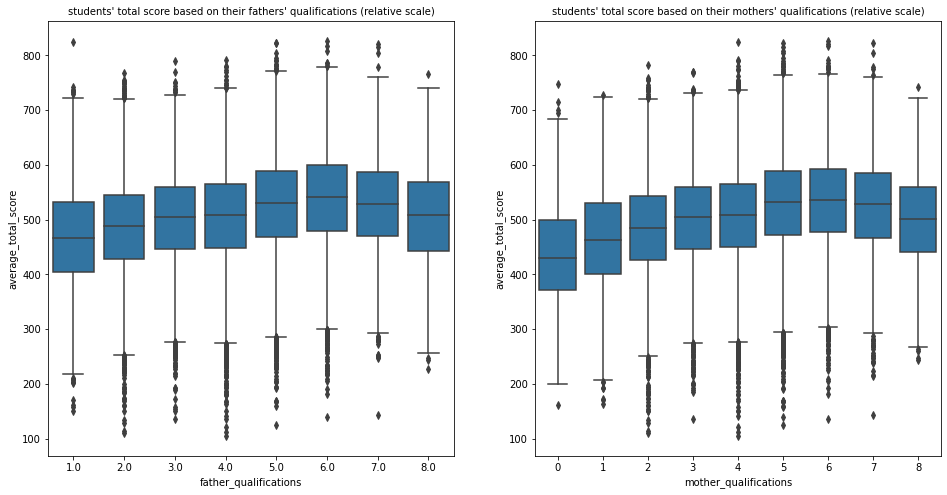

In [31]:
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sb.boxplot(x = clean_pisa.father_qualifications, y = clean_pisa.average_total_score, color = sb.color_palette()[0])
plt.title("students' total score based on their fathers' qualifications (relative scale)", fontsize = 10)

plt.subplot(1,2,2)
sb.boxplot(x = clean_pisa.mother_qualifications, y = clean_pisa.average_total_score, color = sb.color_palette()[0])
plt.title("students' total score based on their mothers' qualifications (relative scale)", fontsize = 10)


plt.show()


> There is a clear increase in students' scores along parents' educational background increase (especially for mothers). More importantly, outliers (abnormally low grades) seeem to be more when either of the parents have low educational background



> Moreover, for the highest categories in parents' educational qualifications, there is a slight decrease in students' scores.




#### plot the distribution of parents' qualifications based on country

<Figure size 1800x1296 with 0 Axes>

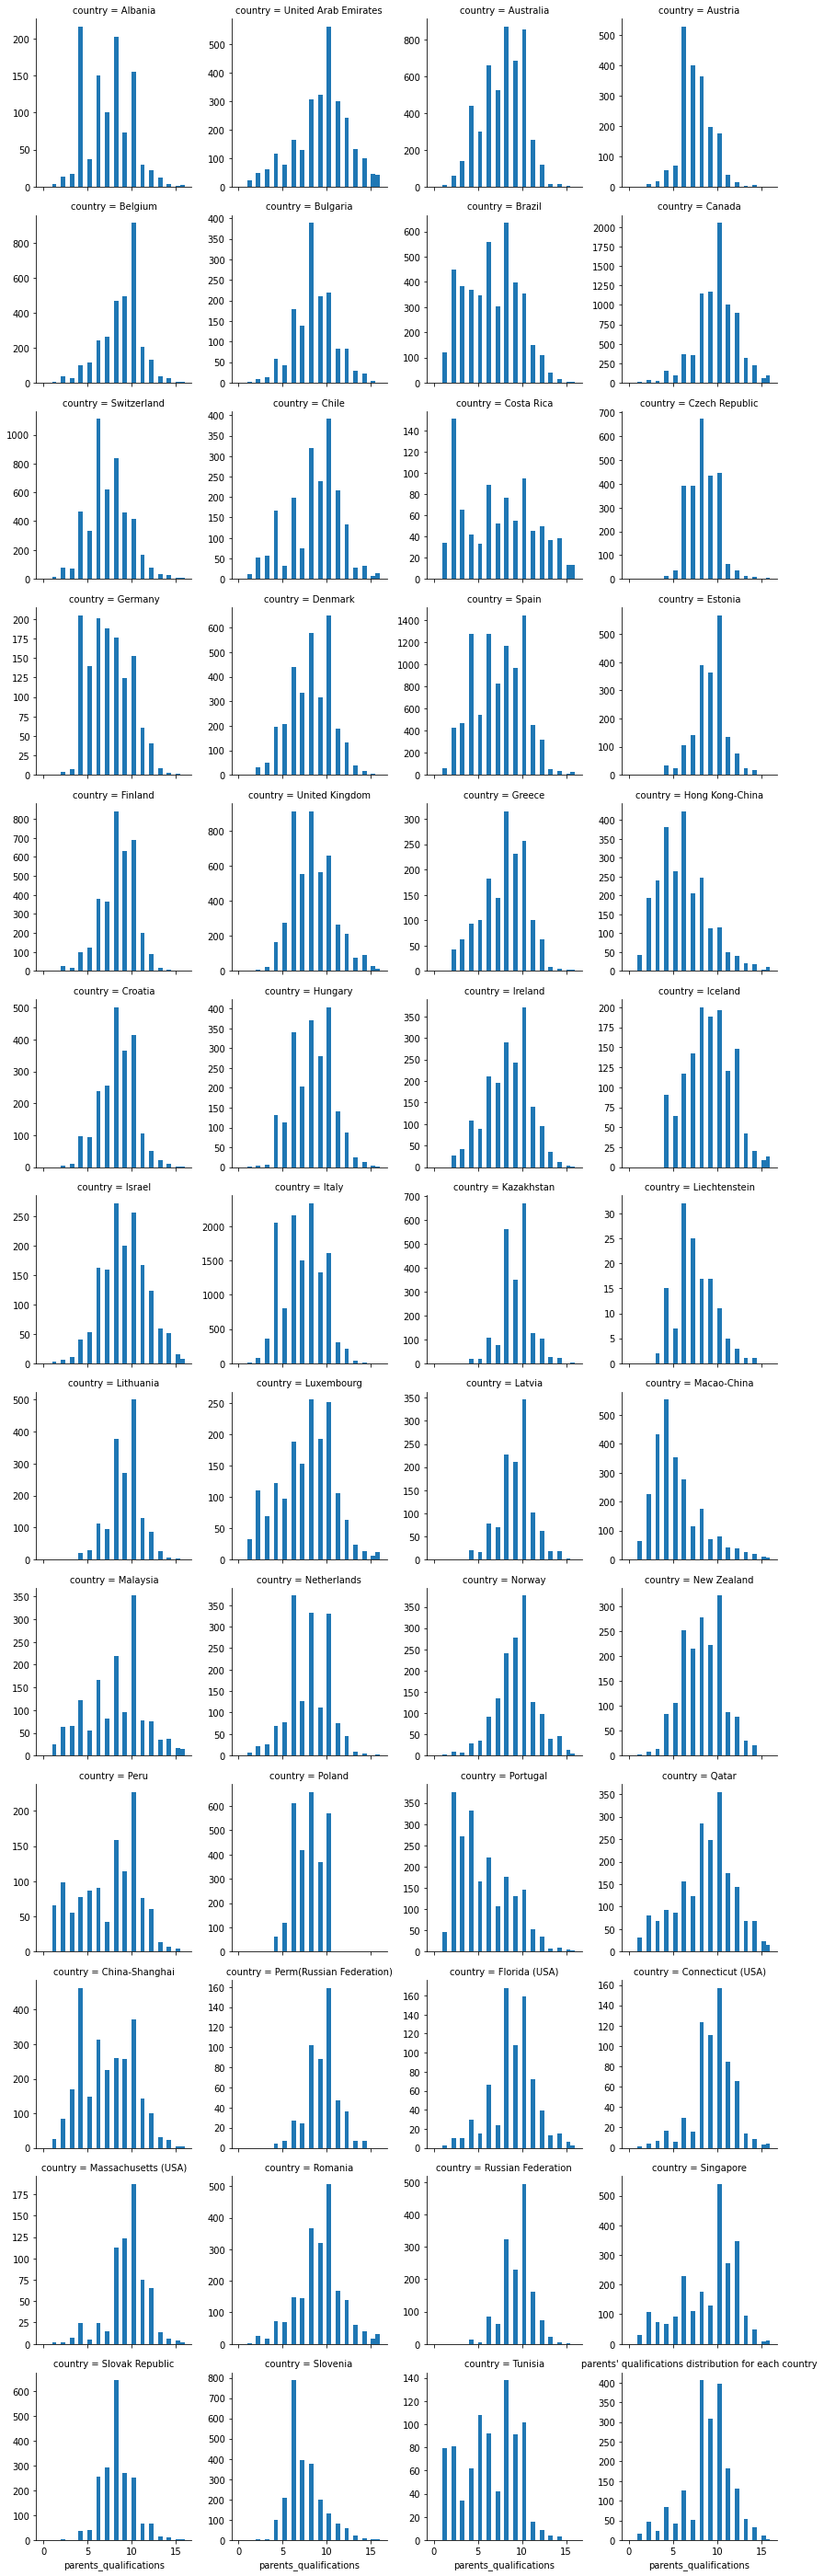

In [84]:
plt.figure(figsize = (25,18))

step = 0.5
bins = np.arange(0, clean_pisa.parents_qualifications.max() + step, step) 

g = sb.FacetGrid(data = clean_pisa, col = 'country', col_wrap = 4, sharey = False).map(plt.hist, 'parents_qualifications', bins = bins)
plt.title("parents' qualifications distribution for each country", fontsize = 10)

plt.show()



> I set **sharey = False** to see the relative distribution of parents' educational qualificiations regardless of the different size of records for each country.





### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> we found that there was a clear linear correlation between mothers' and fathers' educational qualifications

### Were there any interesting or surprising interactions between features?

> Yes, I found that although students' scores were increasing linearly with parents' qualifications, scores start to decrease at very high qualifications. May be this is a signal that highly qualified parents are busy caring about their children

## Multivariate Exploration


#### plot the relation between parents' qualifications and each of math, reading, and science scores.

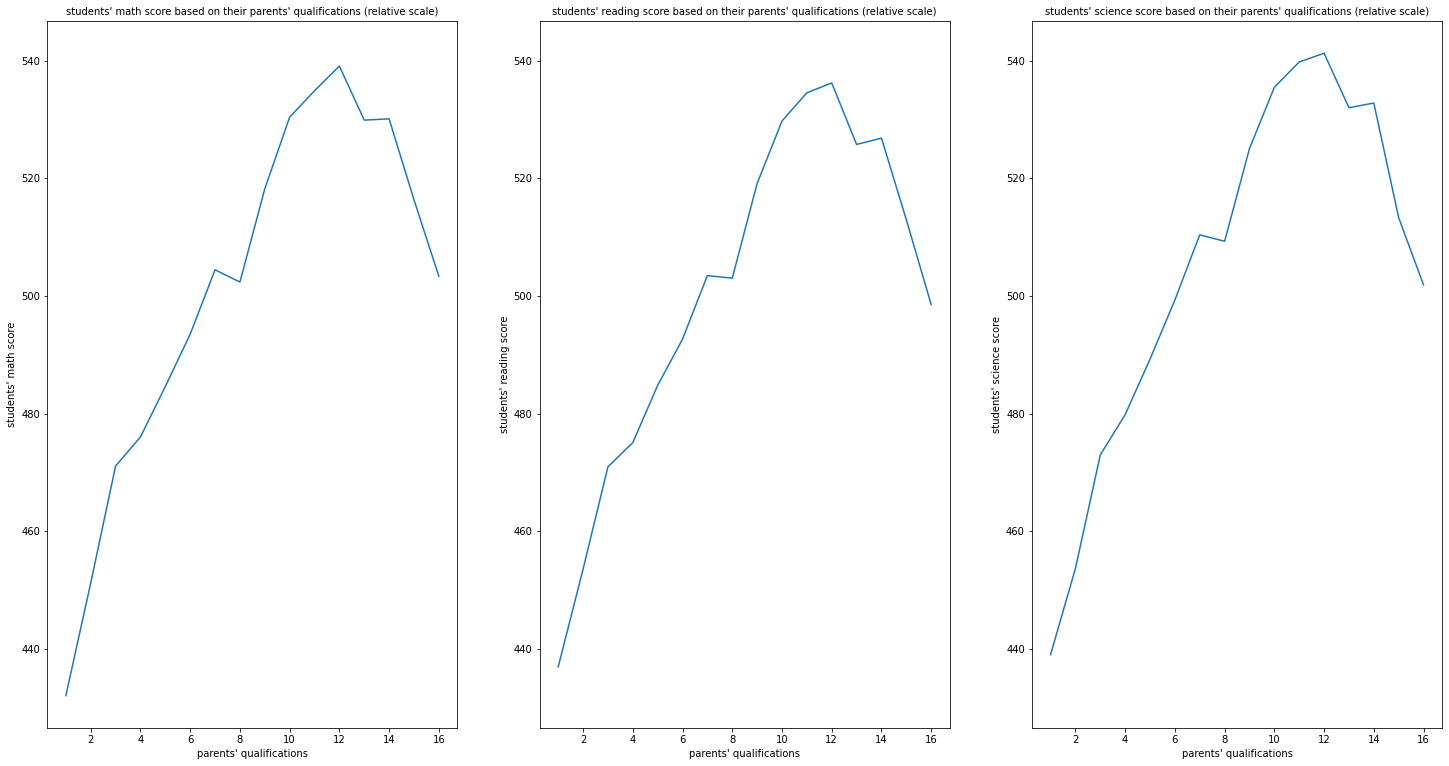

In [86]:

plt.figure(figsize = (25,13))

ax1 = plt.subplot(1,3,1)
math_means = clean_pisa.groupby(['parents_qualifications']).average_math_score.mean()
plt.plot(math_means.index, math_means.values) 
plt.xlabel("parents' qualifications")
plt.ylabel("students' math score")
plt.title("students' math score based on their parents' qualifications (relative scale)", fontsize = 10)

ax2 = plt.subplot(1,3,2, sharey = ax1)
reading_means = clean_pisa.groupby(['parents_qualifications']).average_reading_score.mean()
plt.plot(reading_means.index, reading_means.values)
plt.xlabel("parents' qualifications")
plt.ylabel("students' reading score")
plt.title("students' reading score based on their parents' qualifications (relative scale)", fontsize = 10)


ax3 = plt.subplot(1,3,3, sharey = ax2)
sci_means = clean_pisa.groupby(['parents_qualifications']).average_sci_score.mean()
plt.plot(sci_means.index, sci_means.values)
plt.xlabel("parents' qualifications") 
plt.ylabel("students' science score")
plt.title("students' science score based on their parents' qualifications (relative scale)", fontsize = 10)
plt.show()







> All three test scores are similar to each other

> Again, it's clear that students' scores, surprisingly, fall when parents' educational qualifications are very low or very high.



#### plot the heat map on the correlation of numeric variables in the dataset

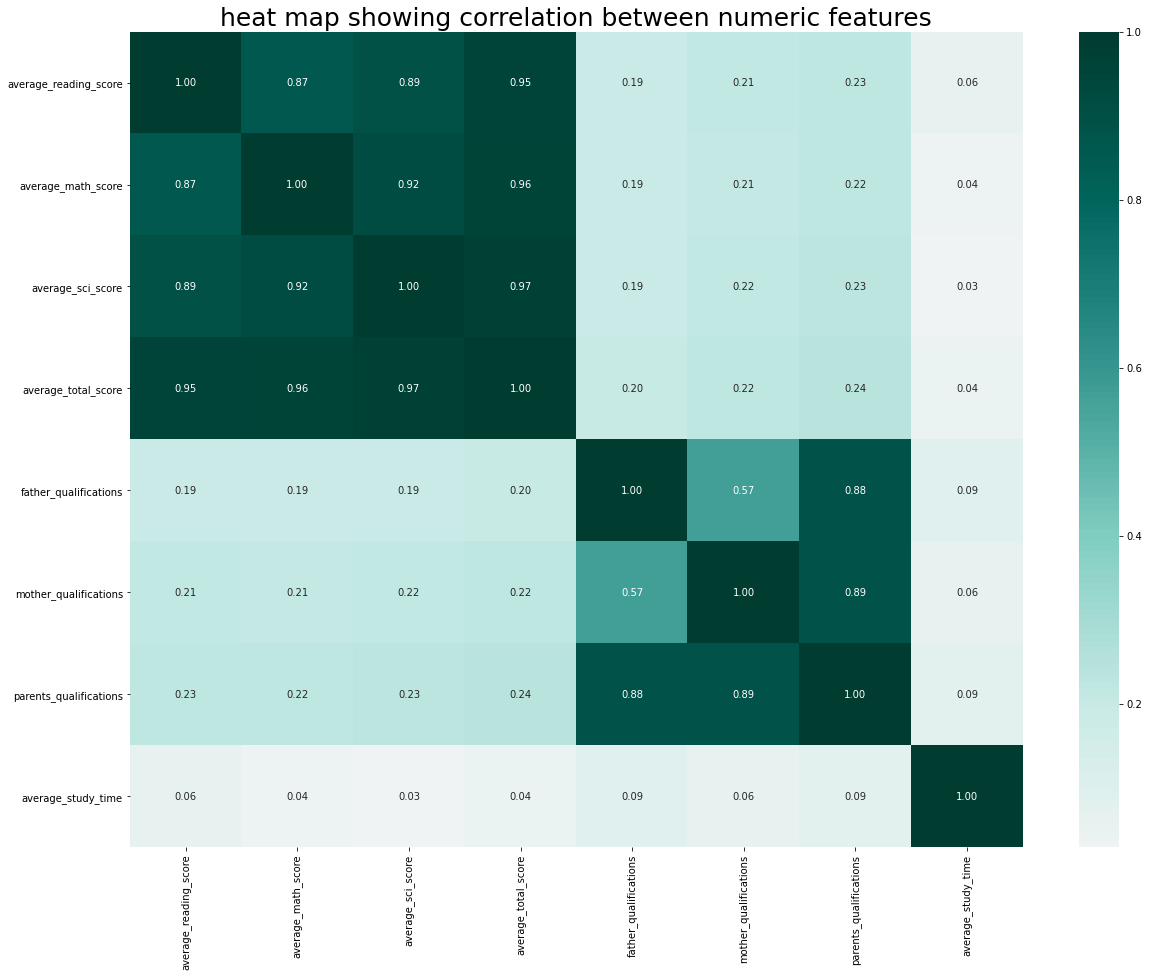

In [67]:
plt.figure(figsize = (20, 15))

sb.heatmap(clean_pisa.corr(), annot = True, fmt = '.2f', cmap = 'BrBG', center = 0)
plt.title('heat map showing correlation between numeric features', fontsize = 25)
plt.xticks(rotation = 90)

ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)

plt.show()



> the heat map shows high correlation between each of the parents' educational background and high correlation between subjects scores. But low correlation between parents qualification and students' scores.



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Due to inbalance in data, some countries are under represented and others are over represented. Thus, the distribution of parents' qualifications based on countries were not as accurate or informative as they should have been.

### Were there any interesting or surprising interactions between features?

> Yes, it was very strange that, based on the heat map, studying time doesn't have the exptected influence on scores. 